Pixel Graphics and Ocean Volume

(1) Load and display the topography and bathymetry data file with the following commands:

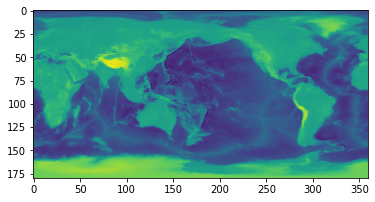

In [43]:
import matplotlib.pyplot as plt
import numpy as np
H = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(H)
plt.show()

(2) Write a pair of nested for loops that print the geographic latitude and longitude as well as the
elevation for every data point.

In [44]:
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        print(i, j, H[i][j])

串流輸出內容已截斷至最後 5000 行。
166 40 3090.0
166 41 3058.0
166 42 3039.0
166 43 3014.0
166 44 2986.0
166 45 2939.0
166 46 2905.0
166 47 2887.0
166 48 2881.0
166 49 2843.0
166 50 2824.0
166 51 2814.0
166 52 2805.0
166 53 2801.0
166 54 2803.0
166 55 2779.0
166 56 2743.0
166 57 2661.0
166 58 2620.0
166 59 2561.0
166 60 2437.0
166 61 2372.0
166 62 2347.0
166 63 2280.0
166 64 2224.0
166 65 2211.0
166 66 2238.0
166 67 2305.0
166 68 2385.0
166 69 2483.0
166 70 2669.0
166 71 2836.0
166 72 2927.0
166 73 3025.0
166 74 3101.0
166 75 3131.0
166 76 3142.0
166 77 3164.0
166 78 3206.0
166 79 3249.0
166 80 3252.0
166 81 3272.0
166 82 3298.0
166 83 3350.0
166 84 3398.0
166 85 3438.0
166 86 3459.0
166 87 3501.0
166 88 3561.0
166 89 3558.0
166 90 3617.0
166 91 3666.0
166 92 3711.0
166 93 3717.0
166 94 3699.0
166 95 3690.0
166 96 3685.0
166 97 3655.0
166 98 3614.0
166 99 3529.0
166 100 3537.0
166 101 3537.0
166 102 3476.0
166 103 3406.0
166 104 3342.0
166 105 3299.0
166 106 3290.0
166 107 3265.0
166 108 3267.0
166 

(3) Determine the size of the patch that corresponds to every data point. Sum them all up and test
if you approximately reproduce the analytical value A=4pR2. This picture may help you
determining the patch size:

In [45]:
surface = 0
R_earth = 6371
exact_surface = 4 * np.pi * R_earth * R_earth

for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        surface += R_earth * R_earth * np.sin(np.radians(i)) * np.radians(1) * np.radians(1)

print("my simulate result: ", surface, "km^2")
print("exact solution: ", exact_surface, "km^2")

error = (surface - exact_surface) / exact_surface * 100

print("error: ", error, "%")

my simulate result:  510051523.9669503 km^2
exact solution:  510064471.90978825 km^2
error:  -0.002538491416481873 %


(4) Now we actually want to compute the fraction of the Earth’s surface that is covered by water.
This requires an if statement because we only want to add those areas where the elevation is
below zero.

In [46]:
water_surface = 0

for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if H[i][j] < 0:
            water_surface += R_earth * R_earth * np.sin(np.radians(i)) * np.radians(1) * np.radians(1)

print("Ratio of ocean to surface area: ", water_surface / exact_surface * 100, "%")

Ratio of ocean to surface area:  70.96519505095871 %


(5) Now compute the volume of the oceans by adding height times area for all patches where
there is water.

In [47]:
ocean_volumn = 0
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if H[i][j] < 0:
            ocean_volumn += R_earth * R_earth * np.sin(np.radians(i)) * np.radians(1) * np.radians(1) * np.abs(H[i][j]) / 1000

print("my ocean volumn: ", ocean_volumn / 10**9, "10^9 km^3")

my ocean volumn:  1.3385383629690015 10^9 km^3
